# Численное решение уравнения пьезопроводности

Рассмотрим движение флюида в конечном проводящем пласте толщиной $H$, проницаемостью $k$ и радиусом $R_e$. 

Уравнение пьезопроводности, описывающее распределение давления в пласте
$$ \frac{\partial P}{\partial t} = \varkappa \Delta P $$ 
где $P = P(r, t)$ - распределение давлания в пласте, $r$ - радиус, $\varkappa = \frac{k}{\mu C_t}$ - коэффициент пьезопроводности, $\Delta$ - оператор Лапласа

![Система](img/system.jpg)

В силу наличия радиальной симметрии будем решать задачу в цилиндрических координатах $(x,y,z) -> (r, \varphi, z)$. \
Предполагая,что граничные и начальные условия не зависят от угла $\varphi$ и от координаты $z$ можно упростить уравнение пьезопроводности
$$ \frac{\partial P}{\partial t} = \varkappa \frac{1}{r}\frac{\partial}{\partial r} \Big(r \frac{\partial P}{\partial r} \Big) $$ 


Данное уравнение описывает множество вариантов процесса распределения давления. Чтобы из
бесчисленного количества этих вариантов выбрать один и дать его
полное математическое описание, к уравнению необходимо
добавить условия однозначности - граничные и начальные условия. \
Временные
(начальные) условия содержат распределение температуры в теле в
начальный момент времени. Например, условие равномерного распределения давления в пласте в начальный момент времени $P|_{t=0}=P_0$   \
Граничные условия (ГУ)
определяют особенности протекания процесса на поверхности тела и
могут быть заданы несколькими способами. Рассмотрим только условия первого и второго рода.
- ГУ первого рода - задается условие на саму функцию. Например, условие постянного поддрежания давления на скважине $P(r,t)|_{r=r_w} = P_w$ и на контуре $P(r,t)|_{r = R_e} = P_e$. 
- ГУ второго рода - задается условие на нормальную произовдную функции. Например, условие постянного дебита $Q = \frac{k H}{18.41 \mu B} \Big(r\frac{\partial P}{\partial r} \Big)\Big|_{r=r_w} $ и условие непроницаемости внешнего контура $r\frac{\partial P}{\partial r} \Big|_{r=R_e} = 0$.


Будем решать данное уравнение в частный производных численно с помощью метода конечный разностей (МКР). \
Идея МКР: представим конечный пласт в виде совокупности узлов, аппроксимируем частные производные конечными разностями -> получаем СЛАУ для определения значения давления в каждом узле.

Введем равномерную сетку по времени и по пространственной координате (радиусу). \
Для этого заменим область непрерывного изменения функции $P(r,t)$ дискретным набором точек, который равномерно покрывает всю область изменения функции.
$$ r_i = i h, i = 0,1,2,..., M $$
$$ t_n = n dt, i = 0,1,2,..., N $$
где $h$ - шаг сетки по пространству, $dt$ - шаг сетки по времени.
\
Заменим частные производные на их разностными аналогами
$$ \frac{\partial P}{\partial t} = \frac{P_i^{n+1} - P_i^{n}}{dt} $$
$$  \frac{1}{r}\frac{\partial}{\partial r} \Big(r \frac{\partial P}{\partial r} \Big) = \frac{1}{h^2} \Big[ r_{i+\frac{1}{2}} P_{i+1}^{n+1} - (r_{i-\frac{1}{2}} + r_{i+\frac{1}{2}})P_i^{n+1} + r_{i-\frac{1}{2}}P_{i-1}^{n+1} \Big] $$
где $r_{i-\frac{1}{2}} = \frac{r_{i-1} + r_i}{2}$, $r_{i+\frac{1}{2}} = \frac{r_{i+1} + r_i}{2}$

Получаем СЛАУ
$$\mu C_t \frac{P_i^{n+1} - P_i^{n}}{dt}=  \frac{k}{h^2} \Big[ r_{i+\frac{1}{2}} P_{i+1}^{n+1} - (r_{i-\frac{1}{2}} + r_{i+\frac{1}{2}})P_i^{n+1} + r_{i-\frac{1}{2}}P_{i-1}^{n+1} \Big] $$
Сведем систему к виду
$$ A_i P_{i+1}^{n+1} - B_i P_{i}^{n+1} + C_i P_{i-1}^{n+1} = F_i $$
где $A_i = \frac{k}{h^2}\frac{r_{i+\frac{1}{2}}}{r_i}$, $B_i = \frac{k}{h^2} \frac{r_{i+\frac{1}{2}}+r_{i-\frac{1}{2}}}{r_i} + \frac{\mu C_t}{dt}$, $C_i =\frac{k}{h^2}\frac{r_{i-\frac{1}{2}}}{r_i} $, $F_i = - \frac{\mu C_t}{dt} T_i^n$

СЛАУ имеет трехдиагональную структуру и решается методом прогонки. \
С помощью метода прогонки можно перейти от трехточечной системы к двухтучечной вида
$$ P_{i-1}^{n+1} = \alpha_{i-1} P_{i}^{n+1} + \beta_{i-1} $$
Подставляя данное соотношениче в трехточную систему получим значения $\alpha$ и $\beta$
$$ \alpha_i = \frac{A_i}{B_i - C_i \alpha_{i-1}} \qquad \beta_i = \frac{C_i \beta_{i-1} - F_i}{B_i-C_i \alpha_{i-1}} \qquad i = 1,2,3,..., N-1 $$
Как можно видеть, для определения $\alpha_i$ и $\beta_i$ необходимо знать $\alpha_0$ и $\beta_0$, которые можно найти из граничного условия на скважине.

Таким образом метод прогонки сводится к нахождению коэффициентов $\alpha_i$ и $\beta_i$ (прямая подгонка), после чего к нахождению $P_i^{n+1}$ при известном значении $P_N^{n+1}$ (обратная прогонка).

### Аппроксимация граничных условий
#### Рассмотрим ГУ 1 рода на скважине (поддержание постоянного давления)
$$ P|_{r=r_w} =  P_w$$
Согласно методу прогонки
$$ P_{0}^{n+1} = \alpha_0 P_1^{n+1} + \beta_0 $$
Нам нужно
$$ P_{0}^{n+1} = P_{0}^{n} = P_{0}$$
Тогда 
$$ \alpha_0 = 0 \qquad \beta_0 = P_{0}$$
#### Рассмотрим ГУ 2 рода на скважине (поддержание постоянного дебита)
Формула Дюпии 
$$Q = \frac{k H}{18.41 \mu B} \Big(r\frac{\partial P}{\partial r} \Big)\Big|_{r=r_w} $$
Аппроксимация дифференциального оператора
$$ \frac{\partial P}{\partial r}|_{r=r_w} = \frac{P_2 - P_1}{h} = \frac{18.41 \mu B Q}{kH r_0} $$
Получаем 
$$ P_1 = P_2 - h \frac{18.41 \mu B Q}{kH r_0}$$
Тогда
$$ \alpha_0 = 1 \qquad \beta_0 = - h \frac{18.41 \mu B Q}{kH r_0}$$
#### Рассмотрим ГУ 1 рода на контуре (поддержание постоянного давления)
$$ P|_{r=R_e} =  P_e$$
Значение давления на каждом последующем временном слое без проблем можно определить обычным присвоением 
$$ P_N^{n} = P_e \qquad n = 0,1,2,...,N $$
#### Рассмотрим ГУ 2 рода на скважине (Отсутствие перетока через границу)
...


In [3]:
# импорт библиотек 
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

## Метод прогонки

In [128]:
def tridiag_mat_alg(dt, h, K, mu, C_t, B_0, H, array_R, array_T, bc_well, bc_contour):
    '''
    Метод прогонки
    
    dt - шаг по времени
    h - шаг по пространству
    array_R - вектор координат
    array_T - вектор моментов времени
    K - проницаемость
    mu - вязкость
    C_t - полная сжимаемость
    B_0 - обьемный коэффициент
    H - мощность
    bc_well - тип граничного условия на скважине
    bc_contour - тип граничного условия на контуре 
    
    new_array_T - вектор значений давления на следующем временном шаге
    '''
    
    kappa = K/(mu * C_t) # коэффициент пьезопроводности 
    
    A = np.zeros(len(array_R))
    B = np.zeros(len(array_R))
    C = np.zeros(len(array_R))
    F = np.zeros(len(array_R))

    alpha = np.zeros(len(array_R))
    beta = np.zeros(len(array_R))
    new_array_T = np.zeros(len(array_R))
    new_array_T[0] = array_T[0]

    if bc_well['type'] == 'type_1':
        alpha[0] = 0
        beta[0] = array_T[0]
    else:
        alpha[0] = 1
        beta[0] = -18.41*mu*B_0/(K*H*array_R[0])*bc_well['value']*h

    for i in range(1, len(array_R)-1):
        r_right = (array_R[i] + array_R[i+1])/2
        r_left = (array_R[i] + array_R[i-1])/2
        
        A[i] = K*1/h**2 * 1/array_R[i] * r_right
        B[i] = K*1/h**2 * (r_right + r_left)/array_R[i] + mu*C_t*1/dt
        C[i] = K*1/h**2 * r_left/array_R[i]
        F[i] = -array_T[i]/dt *mu*C_t
        
        alpha[i] = A[i]/(B[i] - C[i]*alpha[i-1])
        beta[i] = (C[i]*beta[i-1] - F[i])/(B[i] - C[i]*alpha[i-1])
        
    # new_array_T[-1] = (2*kappa*dt*K*beta[-2] + h**2 * K * array_T[-1])/(K*h**2 +2*kappa*dt*K* (1 - alpha[-2]))
    
    if bc_contour['type'] == 'type_1':
        new_array_T[-1] = array_T[-1]
    else:
        new_array_T[-1] = 70#(2*kappa*dt*K*beta[-2] + h**2 * K * array_T[-1])/(K*h**2 +2*kappa*dt*K* (1 - alpha[-2]))
    
    for i in range(len(array_R)-1, 0, -1):
        new_array_T[i -1] = alpha[i-1]*array_T[i] + beta[i-1]
        
    return new_array_T

## Функция решения уравнения пьезопроводности

In [73]:
def solve_eq_pressure(r_mesh, h, time_mesh, dt, K, mu, C_t, B_0, H, P_0, bc_well, bc_contour):
    '''
    Решение уравнения пьезопроводности
    
    r_mesh - сетка по пространству
    h - шаг сетки по пространству
    time_mesh - сетка по времени
    dt - шаг сетки по времени
    K - проницаемость
    mu - вязкость
    C_t - полная сжимаемость
    B_0 - обьемный коэффициент
    H - мощность
    P_0 - начальное давление
    bc_well - граничное условие на скважине (словарь)
    bc_contour - граничное условие на контуре (словарь)
    
    pressure - распределение давлений в пласте на каждом временном слое
    '''
    pressure = np.zeros((len(time_mesh), len(r_mesh))) # массив значений давления на каждом временном слое
    
    pressure[0, :] = P_0 # НУ
    pressure[:, -1] = bc_contour['value'] if bc_contour['type'] == 'type_1' else P_0 # внешнее ГУ
    pressure[:, 0] = bc_well['value'] if bc_well['type'] == 'type_1' else P_0 # внутреннее ГУ
    
    for time_moment in range(1, len(pressure)):
        pressure[time_moment] = tridiag_mat_alg(dt = dt, \
                                                h = h, \
                                                K = K, \
                                                mu = mu, \
                                                C_t = C_t, \
                                                B_0 = B_0, \
                                                H = H, \
                                                array_R = r_mesh, \
                                                array_T = pressure[time_moment - 1], \
                                                bc_well = bc_well, \
                                                bc_contour = bc_contour)
    
    return pressure

## [Функция построения распределения давления](https://plotly.com/python/animations/)

In [148]:
def pressure_plot(data, d_time, time_mesh, r_mesh):
    '''
    Функция для построения распределения давления
    
    data - распределение давления в пласте на каждом временном слое
    d_time - шаг среза массива time_mesh
    time_mesh - сетка по времени
    r_mesh - сетка по пространству
    '''
    years = time_mesh[::d_time]
    pressure = data[::d_time]

    fig_dict = {
        "data": [],
        "layout": {},
        "frames": []
    }

    # fill in most of layout
    fig_dict["layout"]["xaxis"] = {"title": "Radius, m"}
    fig_dict["layout"]["yaxis"] = {'range': [0, 260], "title": "Pressure, atm"}
    fig_dict["layout"]["title"] = 'P(t)'
    fig_dict["layout"]["width"] = 1600
    fig_dict["layout"]["height"] = 700

    fig_dict["layout"]["hovermode"] = "closest"
    fig_dict["layout"]["updatemenus"] = [
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 500, "redraw": True},
                                    "fromcurrent": True, "transition": {"duration": 300,
                                                                        "easing": "quadratic-in-out"}}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                      "mode": "immediate",
                                      "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ]

    sliders_dict = {
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Time:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": []
    }

    # make data
    data_dict = {
        "x": r_mesh,
        "y": pressure[0],
        "mode": "markers",
        "text": 'pressue, atm',
        'marker':dict(color=pressure[0], colorbar=dict(yanchor='top', y=1, title="Pressure"), colorscale='Inferno', size=10)
        }
    fig_dict["data"].append(data_dict)

    # make frames
    for year in range(len(years)):
        frame = {"data": [], "name": str(year)}

        data_dict = {
            "x": r_mesh,
            "y": pressure[year],
            "mode": "markers",
            # "text": 'pressue', ############################
            'marker':dict(color=pressure[year], colorbar=dict(yanchor='top', y=1, title="Pressure"), colorscale='Inferno', size=10)
        }
        frame["data"].append(data_dict)

        fig_dict["frames"].append(frame)
        slider_step = {"args": [
            [year],
            {"frame": {"duration": 300, "redraw": True},
             "mode": "immediate",
             "transition": {"duration": 300}}
        ],
            "label": f'{years[year]} d',
            "method": "animate"}
        sliders_dict["steps"].append(slider_step)


    fig_dict["layout"]["sliders"] = [sliders_dict]

    fig = go.Figure(fig_dict)

    fig.show()
    pass

Инициализация параметров системы

In [138]:
r_w = 0.2 # радиус скважины
R_e = 150 # радиус контура
t_end = 1000 # время

dt = 0.25 # шаг по времени 
h = 0.5# шаг по пространственной координате

P_0 = 250 # начальное далвение

K = 20 # проницаемость
C_t = 3e-5 # полная сжимаемость
mu = 1.5 # вязкость
B_0 = 1.01 # обьемный коэффициент
H = 20 # мощность


r_mesh = np.arange(r_w, R_e + h, h) # пространственная сетка
time_mesh = np.arange(0, t_end + dt, dt) # временная сетка

BC_well_1 = {'type': 'type_1', 'value': 50}
BC_well_2 = {'type': 'type_2', 'value': 80}
BC_contour = {'type':'type_1', 'value' : 250}

In [139]:
pressure_bc_type1 = solve_eq_pressure(r_mesh, \
                             h, \
                             time_mesh, \
                             dt, \
                             K, \
                             mu, \
                             C_t, \
                             B_0, \
                             H, \
                             P_0, \
                             BC_well_1, \
                             BC_contour)

pressure_bc_type2 = solve_eq_pressure(r_mesh, \
                             h, \
                             time_mesh, \
                             dt, \
                             K, \
                             mu, \
                             C_t, \
                             B_0, \
                             H, \
                             P_0, \
                             BC_well_2, \
                             BC_contour)

$$ \frac{\partial P}{\partial t} = \varkappa \frac{1}{r}\frac{\partial}{\partial r} \Big(r \frac{\partial P}{\partial r} \Big) $$ 


$$ P|_{t=0} = P_0 $$
$$ P|_{r=r_w} = P_w $$
$$ P|_{r=R_e} = P_e $$

![Постоянное поддержание давление на скважине и на контуре](img/well_1_contour_1.png)

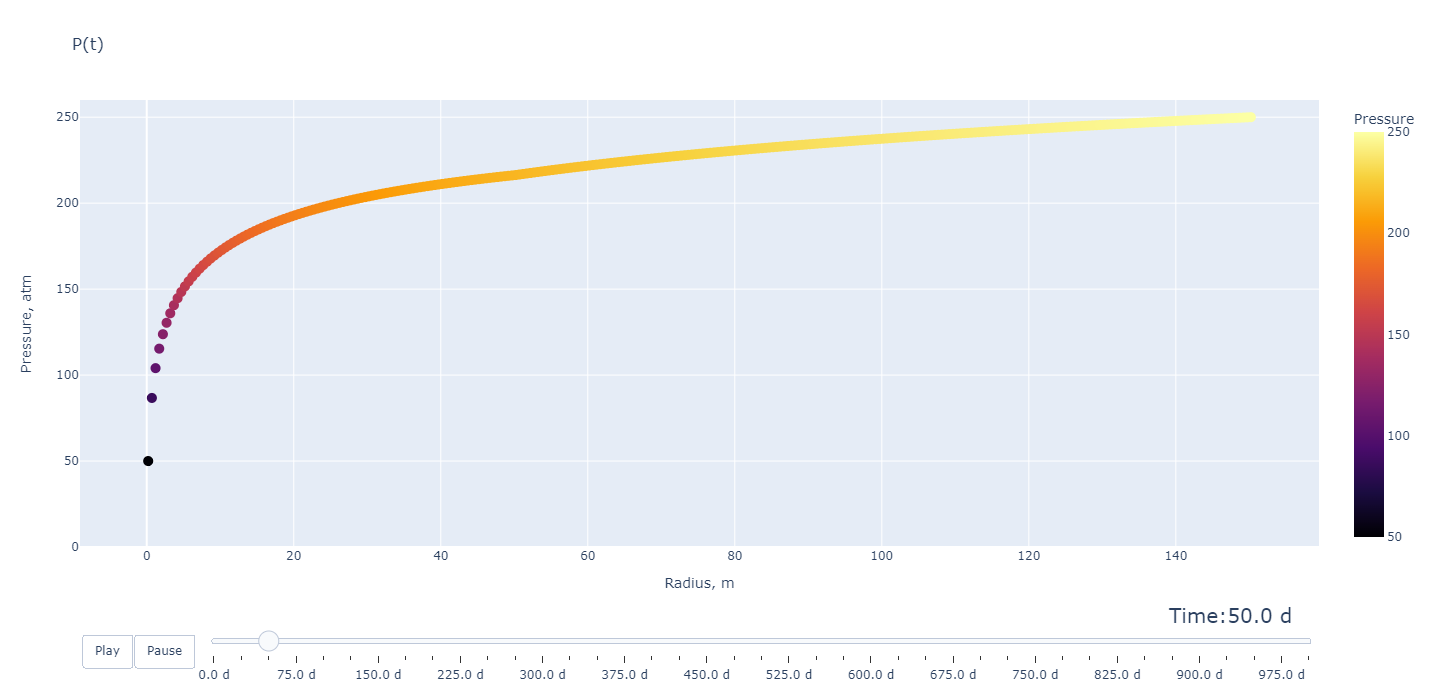

In [150]:
pressure_plot(data = pressure_bc_type1, \
              d_time = 100, \
              time_mesh = time_mesh, \
              r_mesh = r_mesh)

$$ \frac{\partial P}{\partial t} = \varkappa \frac{1}{r}\frac{\partial}{\partial r} \Big(r \frac{\partial P}{\partial r} \Big) $$ 


$$ P|_{t=0} = P_0 $$
$$Q = \frac{k H}{\mu B} \Big(r\frac{\partial P}{\partial r} \Big)\Big|_{r=r_w} $$
$$ P|_{r=R_e} = P_e $$

![Постоянное поддержание дебита и подедржание давления на контуре](img/well_2_contour_1.png)

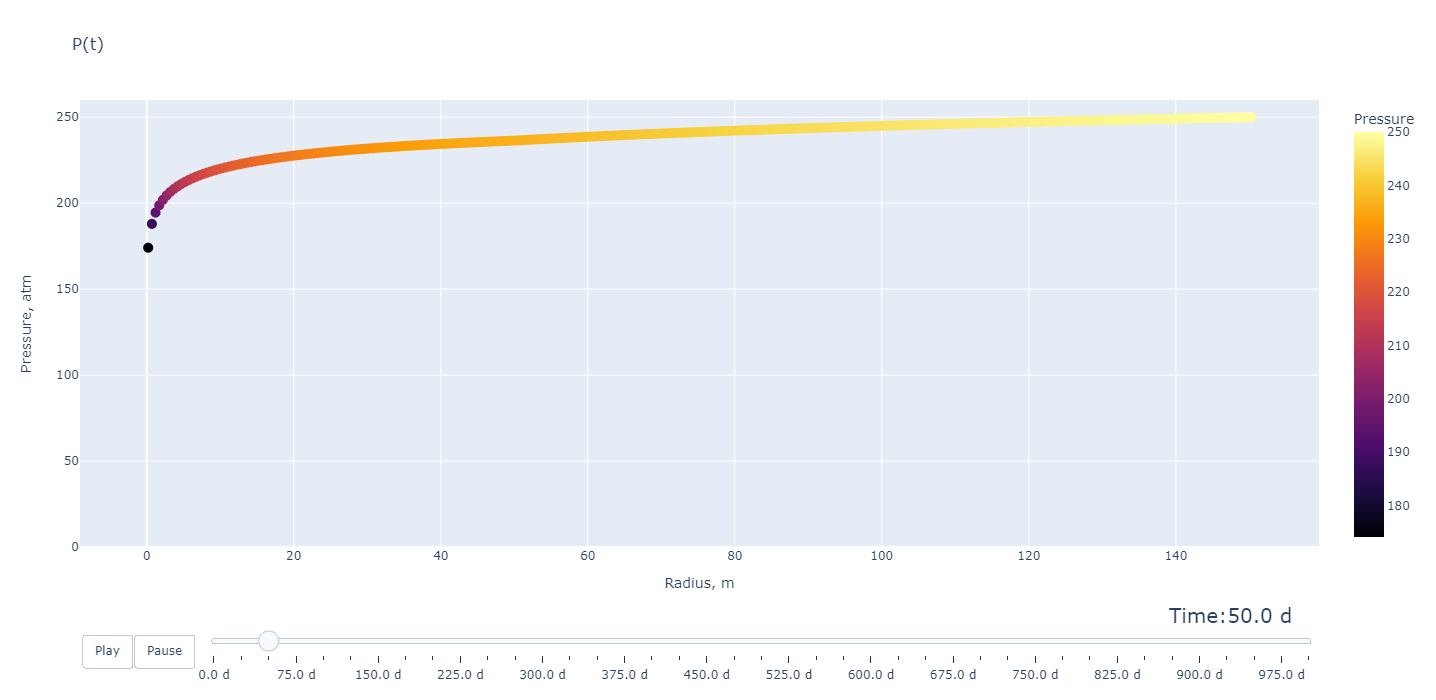

In [151]:
pressure_plot(data = pressure_bc_type2, \
              d_time = 100, \
              time_mesh = time_mesh, \
              r_mesh = r_mesh)

Производительность

In [21]:
%timeit solve_eq_pressure(r_mesh, time_mesh, P_0, P_w, P_e)

21.7 s ± 1.09 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
